In [12]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib

In [13]:
ds = pd.read_csv('/home/me/Downloads/2018-06-20-trades-BTCUSD.csv') # загрузка исторических данных

In [14]:
ts = ds['Timestamp']                                    # создание списка с минутами из unixtime
stmp = []    
for i in ts:
    stmp.append(str (datetime.fromtimestamp(i))[11:-3]) 

In [16]:
ds = ds.drop(ds.index[20000:])   

In [18]:
s = pd.Series(stmp)
ds['Ts'] = s            # добавить список с минутами к данным о сделках

In [19]:
uniq_stmp = list(set(stmp)) # оставить в единственном экземпляре метки времени
uniq_stmp.sort()            # сортировать их

In [21]:
data = dict()
for i in uniq_stmp:
    sell = ds.loc[ds['Ts'] == i].loc[ds['Type'] == 'sell']['Amount'].sum()
    buy = ds.loc[ds['Ts'] == i].loc[ds['Type'] == 'buy']['Amount'].sum()
    data.update({i:(buy, sell)})     # создать словарь типа "время: объем покупок,объем продаж"

In [23]:
dt = pd.DataFrame(data)    # создать датафрейм из словаря

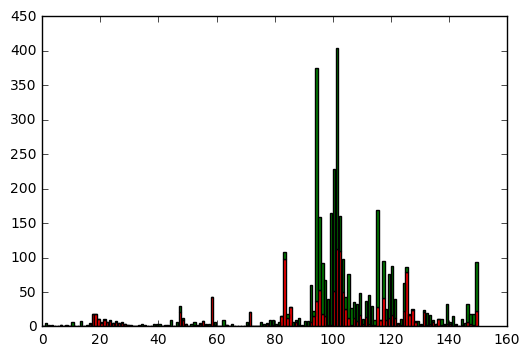

In [30]:
sell_volume = tuple(dt.iloc[1, 1000:1150]) # рассматриваемый отрезок времени - с 1000 по 1150 минуты(от начала суток)
buy_volume = tuple(dt.iloc[0, 1000:1150])

x = range(150) # количество баров

p1 = plt.bar(x, sell_volume, color='r')
p2 = plt.bar(x, buy_volume, bottom=sell_volume, color='g')
plt.show()